# Simple Linear Regression

Linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
- One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
- The other variable, denoted y, is regarded as the response, outcome, or dependent variable.

#### Author
- mavyfaby (Maverick G. Fabroa)

In [164]:
from matplotlib import pyplot as plt
from torch import nn
import torch

### Description

This linear regression uses a threshold value of *0.0001* instead of an epoch value to train the model until the *loss* value is reached the threshold value.

Epoch: 10, Loss: 0.53055435
Epoch: 20, Loss: 0.37854126
Epoch: 30, Loss: 0.27009469
Epoch: 40, Loss: 0.19271646
Epoch: 50, Loss: 0.13750601
Epoch: 60, Loss: 0.09811251
Epoch: 70, Loss: 0.07000470
Epoch: 80, Loss: 0.04994938
Epoch: 90, Loss: 0.03563958
Epoch: 100, Loss: 0.02542933
Epoch: 110, Loss: 0.01814422
Epoch: 120, Loss: 0.01294614
Epoch: 130, Loss: 0.00923726
Epoch: 140, Loss: 0.00659092
Epoch: 150, Loss: 0.00470271
Epoch: 160, Loss: 0.00335546
Epoch: 170, Loss: 0.00239417
Epoch: 180, Loss: 0.00170827
Epoch: 190, Loss: 0.00121888
Epoch: 200, Loss: 0.00086969
Epoch: 210, Loss: 0.00062053
Epoch: 220, Loss: 0.00044276
Epoch: 230, Loss: 0.00031592
Epoch: 240, Loss: 0.00022541
Epoch: 250, Loss: 0.00016083
Epoch: 260, Loss: 0.00011476
Total epoch: 265


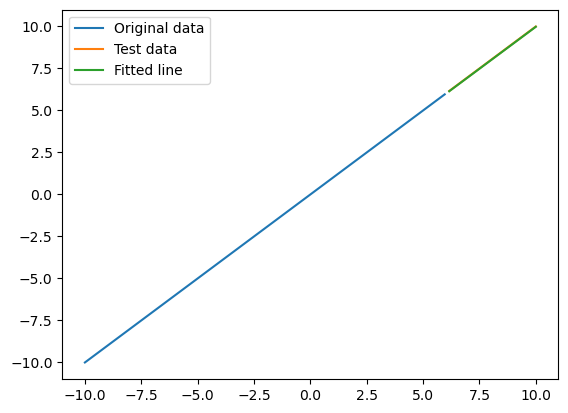

In [247]:
threshold = 0.0001
total = 100
size = 80

# Create a linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return self.linear(x)

data = torch.linspace(-10, 10, total)

train = data[:size]
test = data[size:]

# Create a model
model = LinearRegression(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Loss value
current_loss = 1
current_epoch = 0

# Train the model
while current_loss > threshold:
    # Increase the epoch
    current_epoch += 1
    # Unsqueeze the data
    data = train.unsqueeze(1)
    # Forward pass
    y_pred = model(data)
    # Calculate the loss
    loss = criterion(y_pred, data)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Assign the loss value
    current_loss = loss.item()

    if current_epoch % 10 == 0:
        # Print the loss value
        print('Epoch: {}, Loss: {:.8f}'.format(current_epoch, current_loss))

# Plot the result
y_pred = model(test.unsqueeze(1)).detach().numpy()

print("Total epoch:", current_epoch)

plt.plot(train, train, label='Original data')
plt.plot(test, test, label='Test data')
plt.plot(test, y_pred, label='Fitted line')
plt.legend()
plt.show()